In [1]:
import torch
from whale_identifier.code.models.relationet import CNNEncoder, RelationNetwork
from whale_identifier.code.data.relationset import WhaleRelationset, Processor
from whale_identifier.code.data.transformations import ToTensor, Rescale, Normalize
from whale_identifier.code.trainers.train_relationet import TrainRelationet
from whale_identifier.code.helper_functions import train_test_sampler
from torch.utils.data import DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import logging
import logging.config
from whale_identifier.code.trainers.train_mod import WhaleTrainer

In [2]:
logging.config.fileConfig('logging.ini')

In [3]:
CSV_PATH = "../input/labels/train.csv"
IMG_PATH = "../input/train/"
NUM_BATCHES = 19
CLASSES = 3
IMG_SIZE = 256
EPOCHS = 1

In [4]:
whale_data = WhaleRelationset(CSV_PATH, IMG_PATH, 19, transform=transforms.Compose(
    [Rescale((256,256)),ToTensor(),Normalize()]))


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [11]:
#train, val test sets
train_sampler, val_sampler, test_sampler = train_test_sampler(whale_data, .8, .1, .1)

# get data into Dataloader
train_loader = DataLoader(whale_data, CLASSES, train_sampler)
val_loader = DataLoader(whale_data, CLASSES, val_sampler)
test_loader = DataLoader(whale_data, CLASSES, test_sampler)

In [12]:
encoder  = CNNEncoder(device)
relater = RelationNetwork(64, 8, device)

In [13]:
MSELoss = nn.MSELoss()
encoder_optim = torch.optim.Adam(encoder.parameters(), lr=.0001)
relater_optim = torch.optim.Adam(relater.parameters(), lr=.0001)

In [14]:
trainer = TrainRelationet(encoder, relater, MSELoss, encoder_optim, relater_optim,
                          train_loader,val_loader,EPOCHS, NUM_BATCHES, 
                          CLASSES,IMG_SIZE, device, 
                          load_model=True, encoder_path = '../output/encoder2019-10-31',
                          relater_path = '../output/relater2019-10-31',
                          show_every=10, save=True,
                          save_path = '../output/')

2019-10-31 23:23:54,438 -  INFO - saveing model at ../output/
2019-10-31 23:23:54,450 -  INFO - relater and encoder nets loaded!


In [15]:
trainer.run()

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/ubuntu/code/whale/whale_identifier/code/trainers/train_relationet.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  correct += torch.tensor(predicted == labels).sum().item()


2019-10-31 23:24:26,880 -  INFO - Average Loss at 10: 0.13797938786447048
2019-10-31 23:24:26,881 -  INFO - Total accuracy at 10: 0.756140350877193
2019-10-31 23:24:50,610 -  INFO - Average Loss at 20: 0.1445030378177762
2019-10-31 23:24:50,611 -  INFO - Total accuracy at 20: 0.7447368421052631
2019-10-31 23:25:15,048 -  INFO - Average Loss at 30: 0.1418399538844824
2019-10-31 23:25:15,049 -  INFO - Total accuracy at 30: 0.7374269005847953
2019-10-31 23:25:39,195 -  INFO - Average Loss at 40: 0.1408501102589071
2019-10-31 23:25:39,196 -  INFO - Total accuracy at 40: 0.743421052631579
2019-10-31 23:26:01,956 -  INFO - Average Loss at 50: 0.14314284287393092
2019-10-31 23:26:01,957 -  INFO - Total accuracy at 50: 0.7357894736842105
2019-10-31 23:26:25,558 -  INFO - Average Loss at 60: 0.1457615037759145
2019-10-31 23:26:25,560 -  INFO - Total accuracy at 60: 0.7152046783625731
2019-10-31 23:26:50,168 -  INFO - Average Loss at 70: 0.1436219407511609
2019-10-31 23:26:50,169 -  INFO - Total

2019-10-31 23:46:26,719 -  INFO - Average Loss at 560: 0.13581034780945628
2019-10-31 23:46:26,720 -  INFO - Total accuracy at 560: 0.7429197994987469
2019-10-31 23:46:50,699 -  INFO - Average Loss at 570: 0.13536700658957687
2019-10-31 23:46:50,700 -  INFO - Total accuracy at 570: 0.7442905509387504
2019-10-31 23:47:14,270 -  INFO - Average Loss at 580: 0.13528943570844573
2019-10-31 23:47:14,271 -  INFO - Total accuracy at 580: 0.7441923774954627
2019-10-31 23:47:38,651 -  INFO - Average Loss at 590: 0.13515089895197396
2019-10-31 23:47:38,652 -  INFO - Total accuracy at 590: 0.7444543562295569
2019-10-31 23:48:02,741 -  INFO - Average Loss at 600: 0.13583406153755884
2019-10-31 23:48:02,741 -  INFO - Total accuracy at 600: 0.7423976608187135
2019-10-31 23:48:26,023 -  INFO - Average Loss at 610: 0.13596006660859605
2019-10-31 23:48:26,024 -  INFO - Total accuracy at 610: 0.7414437733678458
2019-10-31 23:48:49,800 -  INFO - Average Loss at 620: 0.13580851948729927
2019-10-31 23:48:49

2019-11-01 00:09:07,206 -  INFO - Total accuracy at 1130: 0.7537028411737308
2019-11-01 00:09:30,902 -  INFO - Average Loss at 1140: 0.13254592354458414
2019-11-01 00:09:30,902 -  INFO - Total accuracy at 1140: 0.7539242843951985
2019-11-01 00:09:55,006 -  INFO - Average Loss at 1150: 0.13255148614068393
2019-11-01 00:09:55,007 -  INFO - Total accuracy at 1150: 0.7532723112128147
2019-11-01 00:10:19,084 -  INFO - Average Loss at 1160: 0.13241323233453622
2019-11-01 00:10:19,085 -  INFO - Total accuracy at 1160: 0.754340592861464
2019-11-01 00:10:43,613 -  INFO - Average Loss at 1170: 0.13211641875055866
2019-11-01 00:10:43,614 -  INFO - Total accuracy at 1170: 0.7551656920077973
2019-11-01 00:11:07,294 -  INFO - Average Loss at 1180: 0.13214906809409543
2019-11-01 00:11:07,295 -  INFO - Total accuracy at 1180: 0.7549212013083556
2019-11-01 00:11:30,807 -  INFO - Average Loss at 1190: 0.1323224711740593
2019-11-01 00:11:30,808 -  INFO - Total accuracy at 1190: 0.7542237947810704
2019-11

2019-11-01 00:30:24,763 -  INFO - Total accuracy at 1670: 0.7561298455720139
2019-11-01 00:30:47,204 -  INFO - Average Loss at 1680: 0.130952171222972
2019-11-01 00:30:47,204 -  INFO - Total accuracy at 1680: 0.7562761069340017
2019-11-01 00:31:11,112 -  INFO - Average Loss at 1690: 0.1309198992139489
2019-11-01 00:31:11,113 -  INFO - Total accuracy at 1690: 0.7562545416796429
2019-11-01 00:31:35,767 -  INFO - Average Loss at 1700: 0.1310341027795392
2019-11-01 00:31:35,768 -  INFO - Total accuracy at 1700: 0.7559339525283798
2019-11-01 00:32:01,047 -  INFO - Average Loss at 1710: 0.13094396718630666
2019-11-01 00:32:01,049 -  INFO - Total accuracy at 1710: 0.7559248999692213
2019-11-01 00:32:26,003 -  INFO - Average Loss at 1720: 0.13094872728120102
2019-11-01 00:32:26,004 -  INFO - Total accuracy at 1720: 0.7558241534067728
2019-11-01 00:32:49,285 -  INFO - Average Loss at 1730: 0.13102165037023195
2019-11-01 00:32:49,286 -  INFO - Total accuracy at 1730: 0.7559983774465064
2019-11-0

2019-11-01 00:51:48,633 -  INFO - Total accuracy at 2210: 0.7598475827577995
2019-11-01 00:52:11,227 -  INFO - Average Loss at 2220: 0.12993263783571016
2019-11-01 00:52:11,228 -  INFO - Total accuracy at 2220: 0.760099573257468
2019-11-01 00:52:34,785 -  INFO - Average Loss at 2230: 0.1299337953187091
2019-11-01 00:52:34,785 -  INFO - Total accuracy at 2230: 0.7600424828888365
2019-11-01 00:52:59,346 -  INFO - Average Loss at 2240: 0.1299382298411469
2019-11-01 00:52:59,347 -  INFO - Total accuracy at 2240: 0.7599389097744361
2019-11-01 00:53:22,226 -  INFO - Average Loss at 2250: 0.12992248924159341
2019-11-01 00:53:22,227 -  INFO - Total accuracy at 2250: 0.7599376218323587
2019-11-01 00:53:47,392 -  INFO - Average Loss at 2260: 0.13001814632866104
2019-11-01 00:53:47,394 -  INFO - Total accuracy at 2260: 0.7596258344977488
2019-11-01 00:54:11,728 -  INFO - Average Loss at 2270: 0.12991916015498045
2019-11-01 00:54:11,729 -  INFO - Total accuracy at 2270: 0.7598577942653992
2019-11-

2019-11-01 01:13:15,946 -  INFO - Total accuracy at 2750: 0.7624752791068581









harder daddy


In [16]:
import matplotlib.pyplot as plt

def plot_accuracies():
    accuracy_list = [i for i in trainer.accuracies[0]]
    return plt.plot(accuracy_list)


In [17]:
def plot_losses():
    loss_list = [i for i in trainer.losses[0]]
    return plt.plot(loss_list)

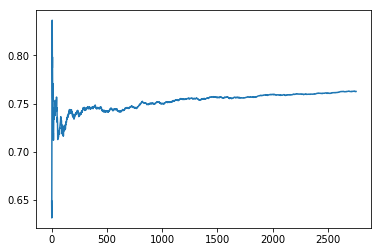

In [18]:
plot_accuracies()

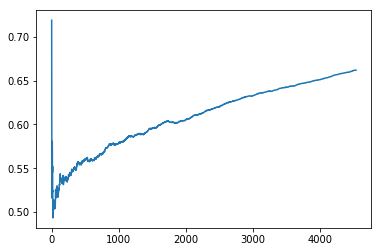

In [15]:
plot_accuracies()

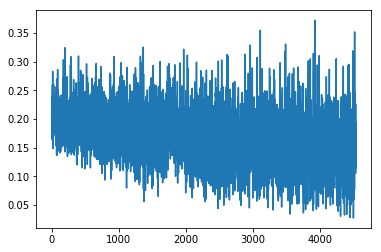

In [16]:
plot_losses()

In [19]:
import numpy as np
np.mean(trainer.losses[0])

0.16460255802373375